In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
directory = '../dataset/'
stocks = ['AMD.csv', 'FB.csv', 'TSLA.csv', 'TWTR.csv', 'MONDY.csv']
stocks = [directory + s for s in stocks]
stocks

['../dataset/AMD.csv',
 '../dataset/FB.csv',
 '../dataset/TSLA.csv',
 '../dataset/TWTR.csv',
 '../dataset/MONDY.csv']

In [3]:
dfs = [pd.read_csv(s)[['Date', 'Close']] for s in stocks]

In [4]:
from functools import reduce
data = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs).iloc[:, 1:]
data.head()

,Close_x,Close_y,Close_x,Close_y,Close
0,16.270000,207.320007,318.869995,44.490002,56.889999
1,16.580000,207.229996,310.100006,44.259998,56.639999
2,16.870001,209.990005,322.690002,44.709999,57.730000
3,16.850000,209.360001,323.850006,43.340000,57.810001
4,16.709999,208.089996,320.230011,43.439999,52.380001


In [5]:
returns = data.pct_change()
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [6]:
cov_matrix

,Close_x,Close_y,Close_x,Close_y,Close
Close_x,0.002342,0.000316,0.000368,0.000387,0.000215
Close_y,0.000316,0.000694,0.000216,0.000463,0.000043
Close_x,0.000368,0.000216,0.001643,0.000516,0.000004
Close_y,0.000387,0.000463,0.000516,0.001240,0.000177
Close,0.000215,0.000043,0.000004,0.000177,0.000985


In [7]:
num_portfolios = 25000
results = np.zeros((3,num_portfolios))

In [8]:
for i in range(num_portfolios):
    weights = np.random.random(cov_matrix.shape[0])
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]

In [9]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe'])

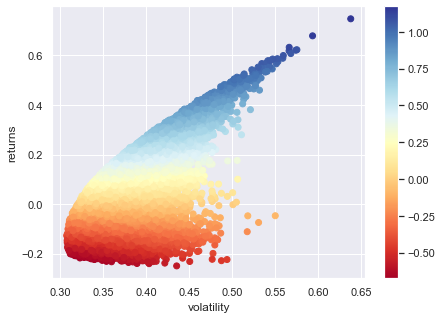

In [10]:
plt.figure(figsize = (7, 5))
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.xlabel('volatility')
plt.ylabel('returns')
plt.show()